<a href="https://colab.research.google.com/github/abdullahsakib/Stock-Market/blob/main/Stock_Market_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/AAPL.csv", on_bad_lines='skip')

In [5]:
df.head(3)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.26,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.95,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.45,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0


In [6]:
df1=df.reset_index()['close']

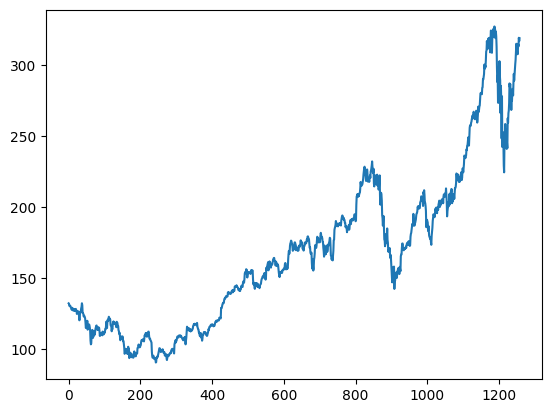

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1 =scaler.fit_transform(np.array(df1).reshape(-1,1))


In [9]:
len(df1)*.65

817.7

In [10]:
training_size=int(len(df1)*.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(817, 441)

In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [13]:
test_data.shape

(441, 1)

In [14]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
time_step=100
X_train, y_train= create_dataset(train_data,time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
ytest.shape

(340,)

In [27]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1 )
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [37]:
model=Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1) ))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(X_train, y_train, validation_data=(X_test, ytest),
          epochs=100, batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 5.6264e-04 - val_loss: 0.0028
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 4.6847e-04 - val_loss: 0.0030
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 5.0681e-04 - val_loss: 0.0026
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 4.5834e-04 - val_loss: 0.0026
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 4.7480e-04 - val_loss: 0.0025
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - loss: 4.4430e-04 - val_loss: 0.0026
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 4.6680e-04 - val_loss: 0.0024
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 4.7578e-04 - val_loss: 0.0023
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 4.1880e-04 - val_loss: 0.0021
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - loss: 4.2185e-04 - val_loss: 0.0021
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - loss: 4.3672e-04 - val_loss: 0.00

In [43]:
import tensorflow as tf

In [59]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [60]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
train_predict[:3]

array([[112.01371],
       [111.90805],
       [111.85926]], dtype=float32)

In [63]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

142.69927403348882

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [65]:
math.sqrt(mean_squared_error(ytest,test_predict))

240.1416357605334

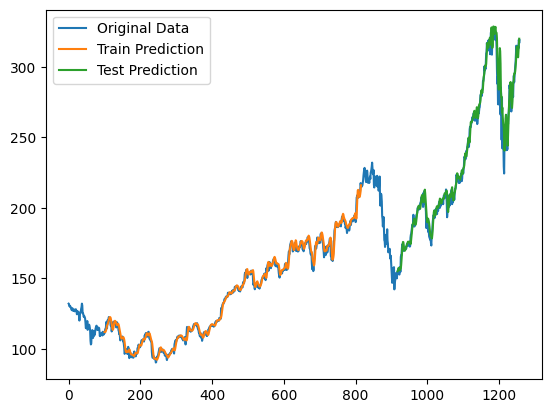

In [76]:
look_back = 100

# Create placeholders for predictions to match the shape of the original dataframe
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2 ) + 1:len(df1) - 1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Original Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')

# Add the legend
plt.legend()

# Display the plot
plt.show()
